<a href="https://colab.research.google.com/github/hky4wzy71/python_opencv_inpaint/blob/main/main_inpaint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Local Threshold hesaplandı


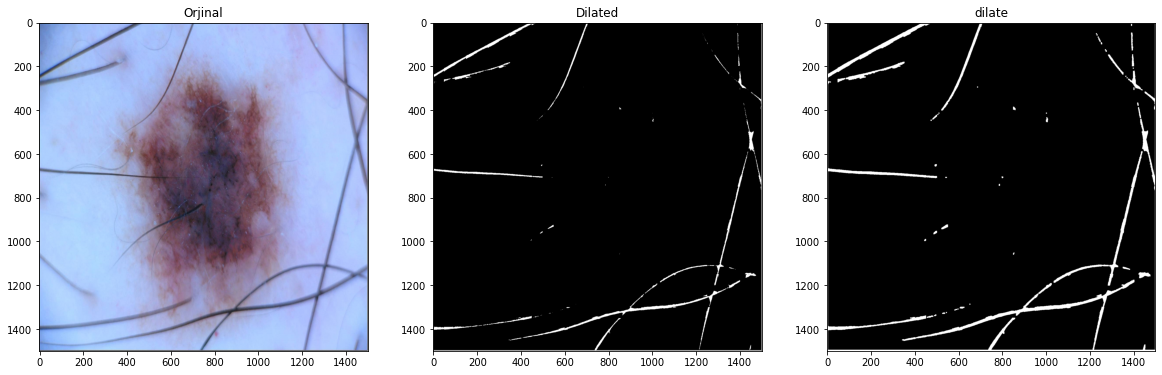

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

size=50       #block size(kernel size)
sensivite= 45 #gürültünün azaltılması için (local threshold degerinin esnetilmesi için) 

x1,x2=(0,size) # Resim Üzerinde gezinmek için gerekli değişlenler
y1,y2=(0,size)

orjinal = cv2.imread("resim1.jpg") #orjinal
img = cv2.cvtColor(orjinal,cv2.COLOR_BGR2GRAY)   #işlenecek görüntü
w,h = img.shape
toplam=0

for i in range(0,int(h/size)):
    for j in range(0,int(w/size)):
        #print(x1,x2,y1,y2)
        #===================Local_threshold_val_bulunması=======================
        for k in range(y1,y2):
            for l in range(x1,x2):
                #print(img[k][l])
                toplam+=img[k][l]
        
        local_threshold = int(toplam/size**2)
        #print(local_threshold)
        toplam=0
        #=======================local_threshold_uygulaması=======================
        for k in range(y1,y2):
            for l in range(x1,x2):
                if img[k][l]>=local_threshold-sensivite:
                    img[k][l]=255
                else:
                    img[k][l]=0
         #=====================================================================
        
        x1+=size
        x2+=size
        if x2>w:
            x1,x2=(0,size)

    y1+=size
    y2+=size
    if y2>h:
        y1,y2=(0,size)
        
print("Local Threshold hesaplandı")

inverse = cv2.bitwise_not(img)
kernel = np.ones((5,5),np.uint8)
iteration_sayisi = 1
dilate = cv2.dilate(inverse,kernel,iterations = iteration_sayisi)

images=[orjinal,inverse,dilate]
titles=["Orjinal","Dilated","dilate"]
plt.figure(figsize=(20,20))
for i in range(len(images)):
    plt.subplot(1,3,i+1)
    plt.imshow(cv2.cvtColor(images[i],cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
plt.show()

Block_Size: 50 	 Hassaslık: 45 	 iteration: 8


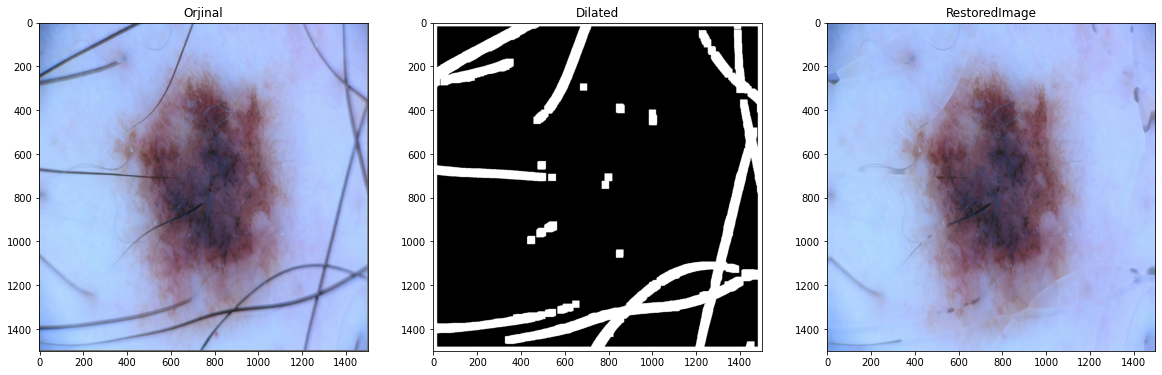

In [ ]:
# Maske elde edilmesi ve inpain uygulaması

inverse = cv2.bitwise_not(img)
kernel = np.ones((5,5),np.uint8)
iteration_sayisi = 8
dilate = cv2.dilate(inverse,kernel,iterations =iteration_sayisi)

restoredImage=cv2.inpaint(orjinal,dilate,3,cv2.INPAINT_TELEA)

print("Block_Size:",size,"\t","Hassaslık:",sensivite,"\t","iteration:",iteration_sayisi )
images=[orjinal,dilate,restoredImage]
titles=["Orjinal","Dilated","RestoredImage"]
plt.figure(figsize=(20,20))
for i in range(len(images)):
    plt.subplot(1,3,i+1)
    plt.imshow(cv2.cvtColor(images[i],cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
plt.show()